<a href="https://colab.research.google.com/github/tunhu-da/Synthetic-Financial-Dataset-EDA/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [5]:
!pip install kaggle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from sklearn.metrics import confusion_matrix
import os
import warnings

In [2]:
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')

# Data Collection

In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/.kaggle"
!mkdir -p /content/.kaggle
!cp kaggle.json /content/.kaggle/

In [4]:
!kaggle datasets download -d ealaxi/paysim1


Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
 87% 155M/178M [00:00<00:00, 240MB/s]
100% 178M/178M [00:00<00:00, 194MB/s]


In [5]:
!unzip /content/paysim1.zip -d /content/

Archive:  /content/paysim1.zip
  inflating: /content/PS_20174392719_1491204439457_log.csv  


In [6]:
df = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [ ]:
df.shape

(6362620, 11)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
df.describe(include='all')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362620,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6362620,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
unique,NaN,5,NaN,6353307,NaN,NaN,2722362,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1902386530,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237500,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


# Data Cleaning

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.duplicated().sum()

0

There is no null, NaN values, no duplicated rows

In [ ]:
df.nunique()

,0
step,743
type,5
amount,5316900
nameOrig,6353307
oldbalanceOrg,1845844
newbalanceOrig,2682586
nameDest,2722362
oldbalanceDest,3614697
newbalanceDest,3555499
isFraud,2


In [ ]:
df['type'] = df['type'].astype('category')
df['isFraud'] = df['isFraud'].astype(np.int8)
df['nameOrig'] = df['nameOrig'].astype('string')
df['nameDest'] = df['nameDest'].astype('string')

df['amount'] = df['amount'].astype(np.float64)

# EDA
## Unvariate
1. **Count of transactions by Type**: Determine the frequency of each transaction type to understand the distribution and identify the most common transaction types.
2. **Count of Fraud Transactions**: Identify the number of fraudulent transactions to assess the prevalence of fraud in the dataset.
3. **Count of Transactions that Flagges as Fraud**: Determine the number of transactions flagged as fraud to evaluate the effectiveness of the fraud detection mechanism.

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


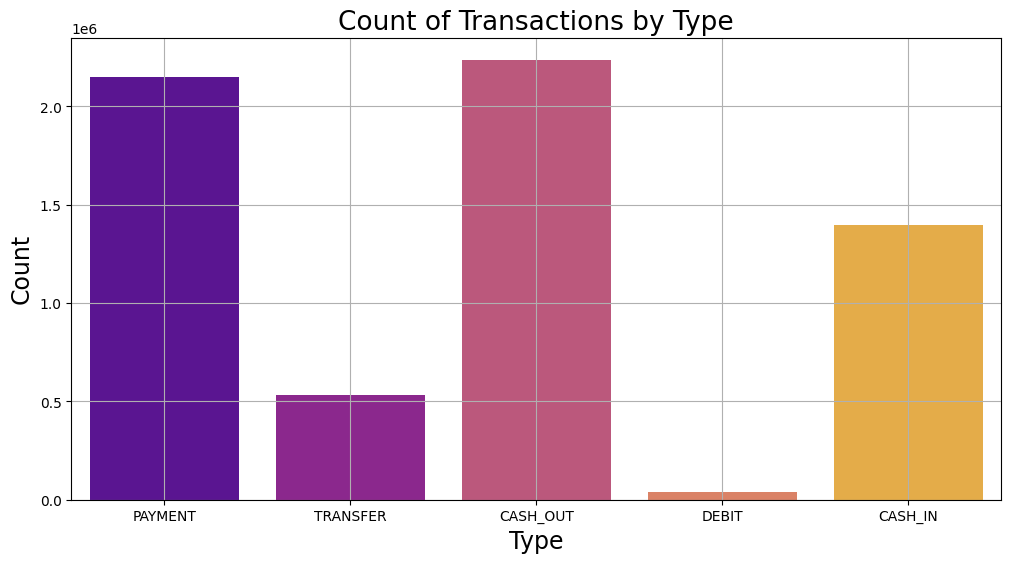

In [5]:
all_types = df['type'].value_counts()
print(all_types)


plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='type', palette='plasma')
plt.title('Count of Transactions by Type', fontsize=19)
plt.xlabel('Type', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.grid(True)
plt.show

isFraud
0    6354407
1       8213
Name: count, dtype: int64


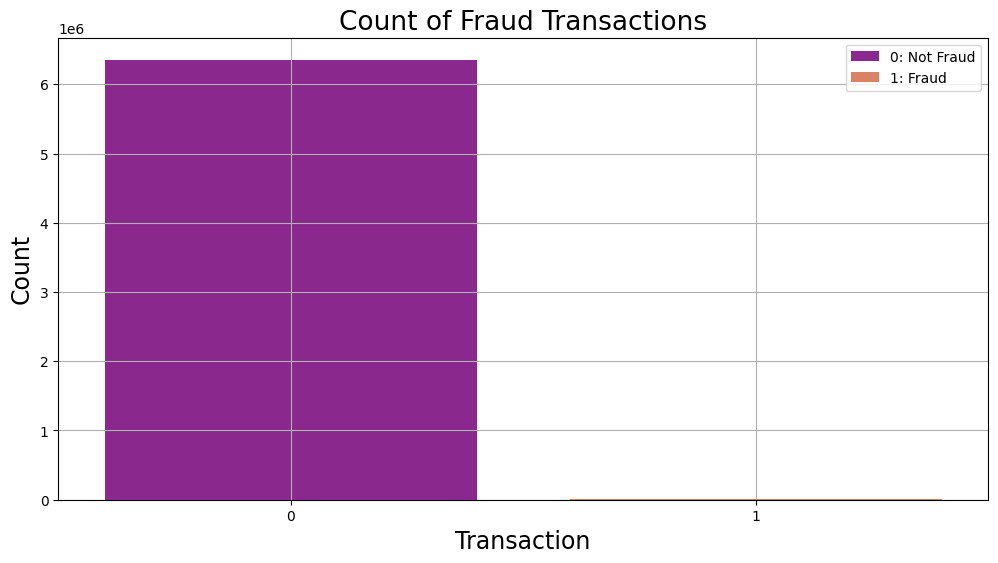

In [6]:
all_types = df['isFraud'].value_counts()
print(all_types)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='isFraud', palette='plasma')
plt.title('Count of Fraud Transactions', fontsize=19)
plt.xlabel('Transaction', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.legend(['0: Not Fraud', '1: Fraud'], loc='upper right')
plt.grid(True)
plt.show()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64


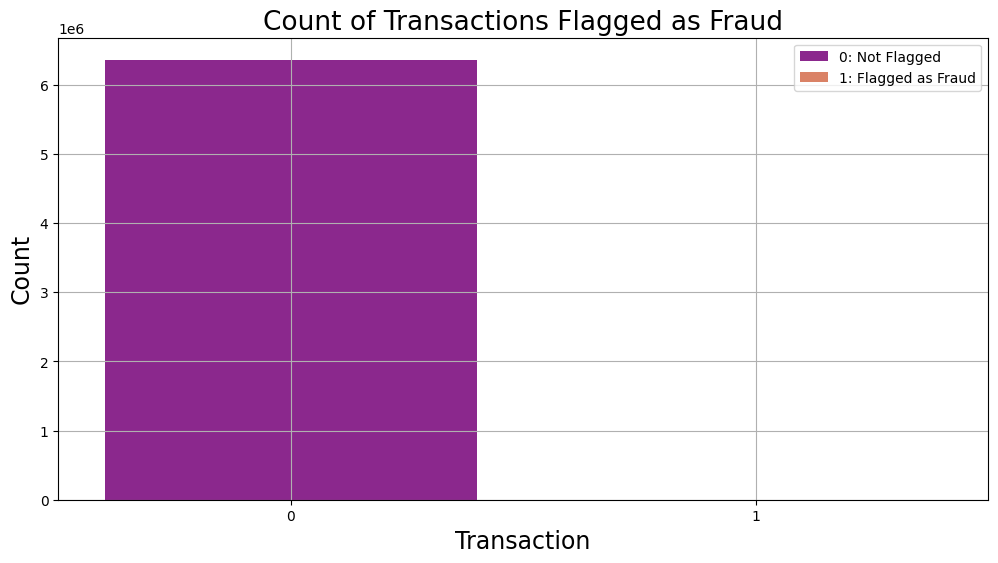

In [7]:
all_types = df['isFlaggedFraud'].value_counts()
print(all_types)

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='isFlaggedFraud', palette='plasma')
plt.title('Count of Transactions Flagged as Fraud', fontsize=19)
plt.xlabel('Transaction', fontsize=17)
plt.ylabel('Count', fontsize=17)
plt.legend(['0: Not Flagged', '1: Flagged as Fraud'], loc='upper right')
plt.grid(True)
plt.show()

## Multivariate Analysis

4. **Correlation Analysis**: Examine the relationships between multiple numerical variables to identify patterns, trends, and potential multicollinearity. This helps in understanding how different variables interact with each other and can provide insights into which variables are most influential in predicting outcomes.

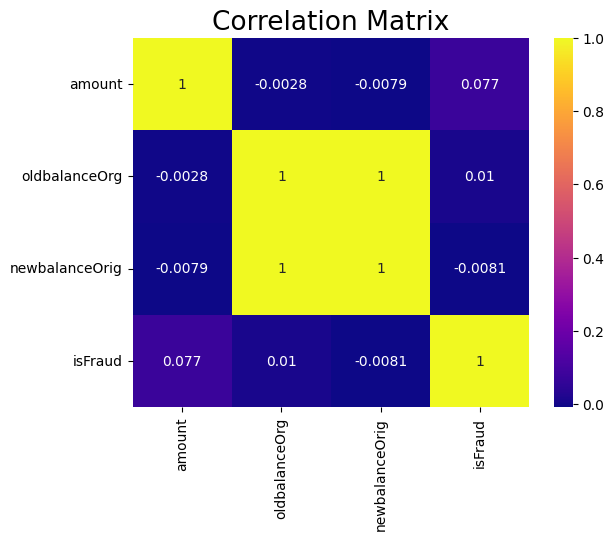

In [ ]:
corr = df['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud'].corr()
sns.heatmap(corr, annot=True, cmap='plasma')
plt.title('Correlation Matrix', fontsize=19)
plt.show()

## Bivariate Analysis

5. **Amount per Transaction**: Analyze the distribution of transaction amounts to understand the range and frequency of different transaction values.
6. **Amount by Step (Hour)**: Examine the transaction amounts over different steps (hours) to identify any patterns or trends in transaction activity throughout the day.
7. **Amount by Day**: Aggregate transaction amounts by day to observe daily trends and fluctuations in transaction activity.
8. **Confusion Matrix for Fraud**: Evaluate the performance of a fraud detection model by comparing the actual fraud labels with the predicted fraud labels, providing insights into the model's accuracy and types of errors.

type
CASH_IN     2.363674e+11
CASH_OUT    3.944130e+11
DEBIT       2.271992e+08
PAYMENT     2.809337e+10
TRANSFER    4.852920e+11
Name: amount, dtype: float64


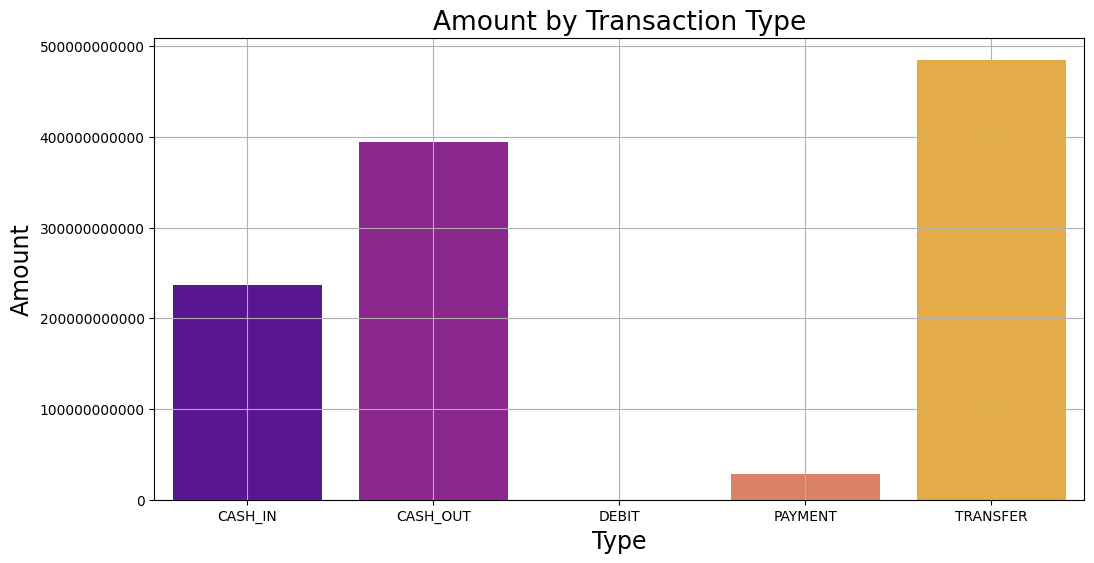

In [ ]:
amt_by_type = df.groupby('type')['amount'].sum()
print(amt_by_type)

plt.figure(figsize=(12, 6))
sns.barplot(x=amt_by_type.index, y=amt_by_type.values, palette='plasma')
plt.title('Amount by Transaction Type', fontsize=19)
plt.xlabel('Type', fontsize=17)
plt.ylabel('Amount', fontsize=17)
plt.ticklabel_format(axis='y', style = 'plain')
plt.grid(True)
plt.show()

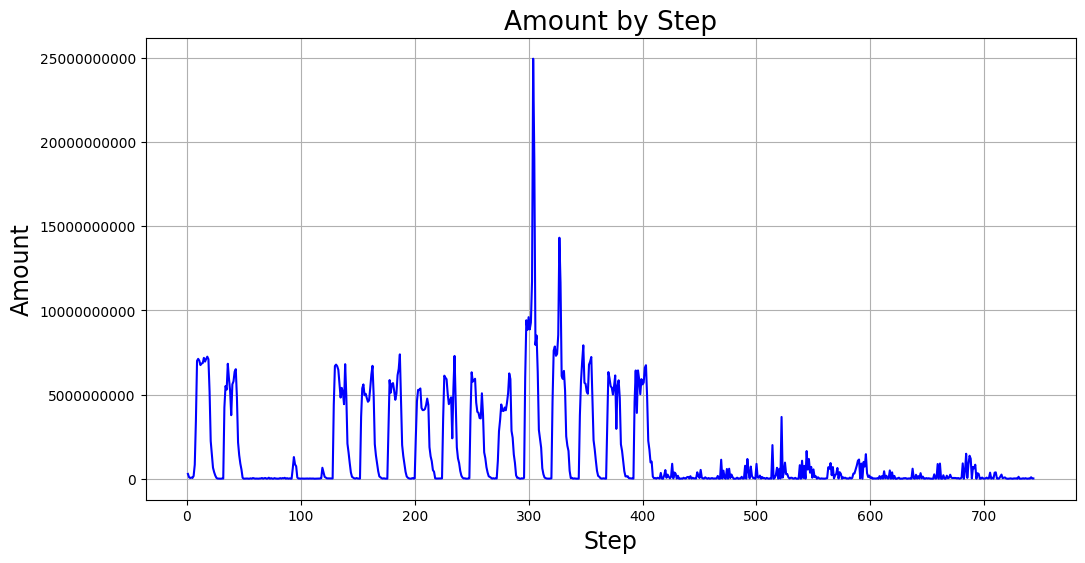

In [ ]:
amt_by_step = df.groupby('step')['amount'].sum()

# Plotting the amount by step
plt.figure(figsize=(12, 6))
sns.lineplot(x=amt_by_step.index, y=amt_by_step.values, color='blue')
plt.title('Amount by Step', fontsize=19)
plt.xlabel('Step', fontsize=17)
plt.ylabel('Amount', fontsize=17)
plt.ticklabel_format(axis='y', style = 'plain')
plt.grid(True)
plt.show()

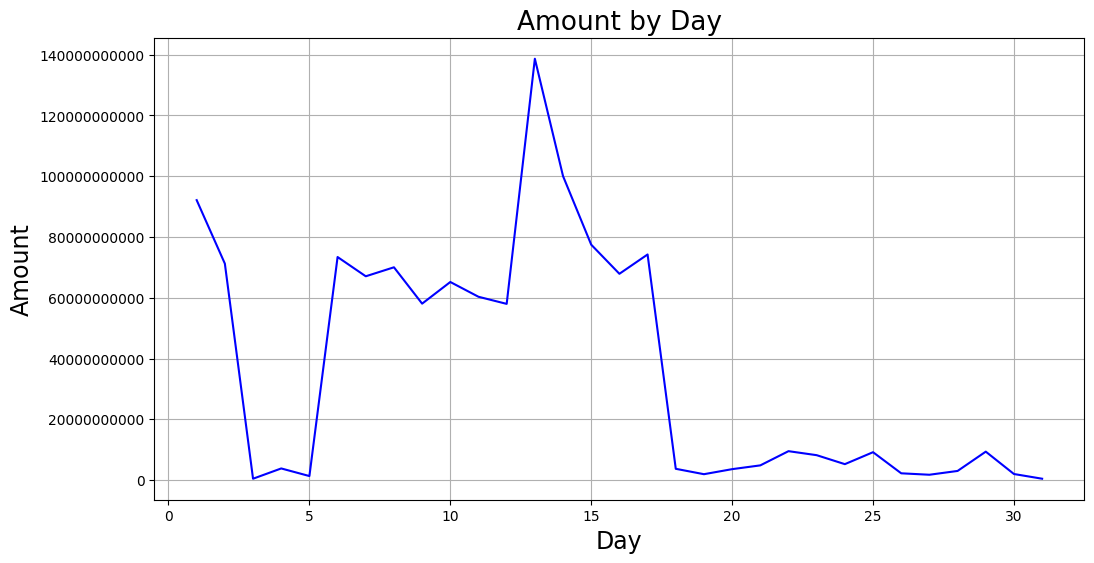

In [ ]:
amt_by_day = [sum(amt_by_step[i:i+24]) for i in range(0, len(amt_by_step), 24)]

# Plotting the amount by day
plt.figure(figsize=(12, 6))
sns.lineplot(x=[i for i in range(1, len(amt_by_day)+1)], y=amt_by_day, color='blue')
plt.title('Amount by Day', fontsize=19)
plt.xlabel('Day', fontsize=17)
plt.ylabel('Amount', fontsize=17)
plt.ticklabel_format(axis='y', style = 'plain')
plt.grid(True)
plt.show()

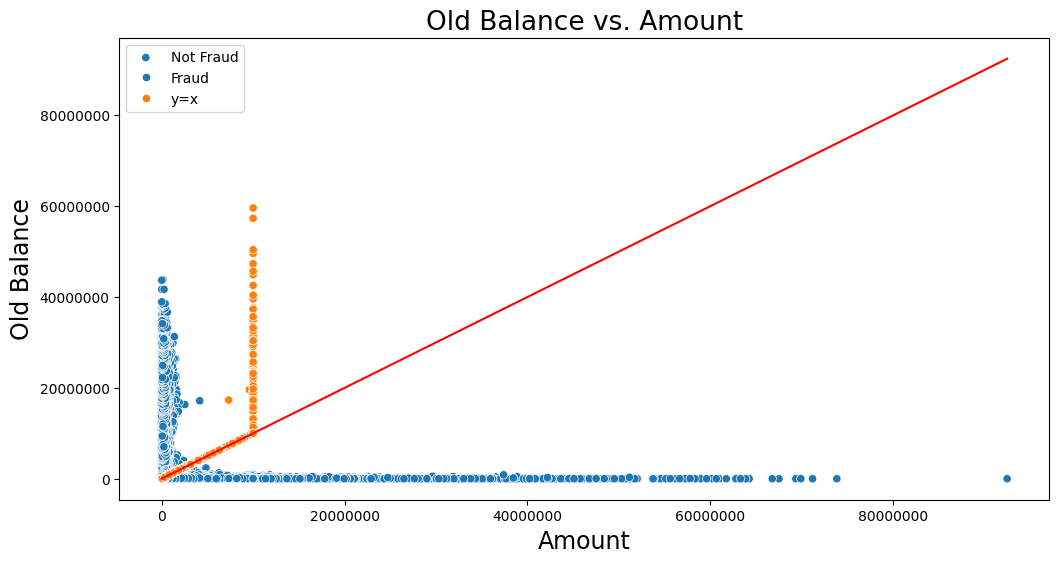

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='amount', y='oldbalanceOrg', hue='isFraud')

amt_max = round(df['amount'].max())
x = np.arange(0, amt_max, 1000)
sns.lineplot(x=x, y=x, c='r', label='y = x')

plt.title('Old Balance vs. Amount', fontsize=19)
plt.xlabel('Amount', fontsize=17)
plt.ylabel('Old Balance', fontsize=17)
plt.legend(['Not Fraud', 'Fraud', 'y=x'])
plt.ticklabel_format(axis='both', style = 'plain')
plt.show()

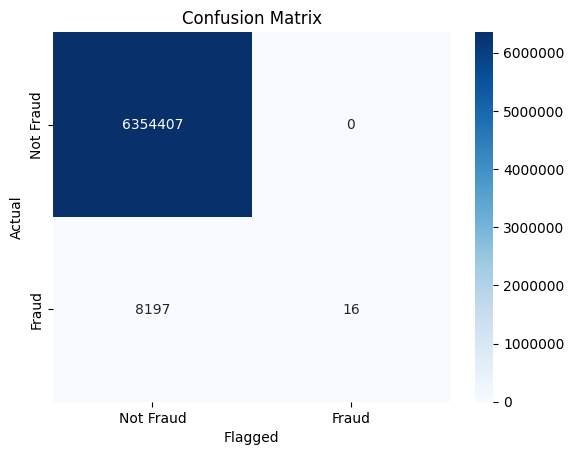

In [8]:
cm = confusion_matrix(df['isFraud'], df['isFlaggedFraud'])

ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Flagged')
plt.ylabel('Actual')

cbar = ax.collections[0].colorbar
cbar.ax.ticklabel_format(style='plain')

plt.title('Confusion Matrix')
plt.show()